Iteration 1 — C: [np.float64(0.2233597880697756), np.float64(0.22393734840593388), np.float64(0.22375184632159645)] — Différence: 0.697171
Iteration 2 — C: [np.float64(0.2224127883060696), np.float64(0.22470478116119935), np.float64(0.22396072228590505)] — Différence: 0.001237
Iteration 3 — C: [np.float64(0.218649244652493), np.float64(0.22773802045346964), np.float64(0.2247405248673933)] — Différence: 0.004896
Iteration 4 — C: [np.float64(0.2055359829667022), np.float64(0.2391881546346651), np.float64(0.22791093594231437)] — Différence: 0.017695
Iteration 5 — C: [np.float64(0.1709680893902741), np.float64(0.2768667373287193), np.float64(0.23975810069632952)] — Différence: 0.052488
Iteration 6 — C: [np.float64(0.12128073461240814), np.float64(0.3495208991043031), np.float64(0.27084512083138357)] — Différence: 0.093348
Iteration 7 — C: [np.float64(0.09400624935653015), np.float64(0.4164075298116882), np.float64(0.28716819554811795)] — Différence: 0.074055
Iteration 8 — C: [np.float64(0.

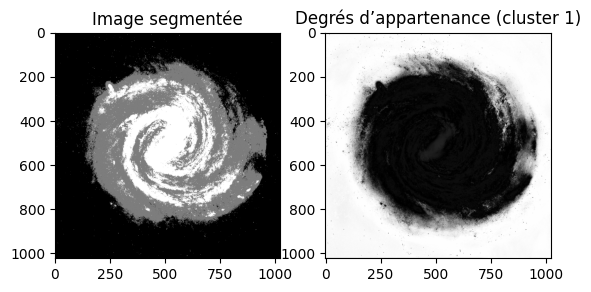

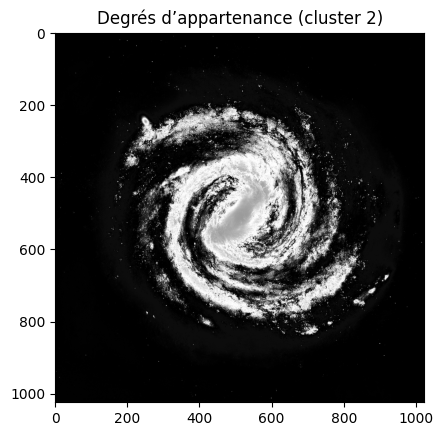

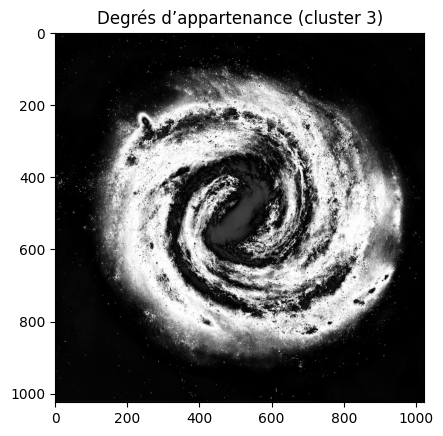

In [6]:
import numpy as np
import cv2
import random



def initialiser_matrice_U(nb_points, K):
    U = []
    for _ in range(nb_points):
        v = np.random.rand(K)
        v = v / v.sum()
        U.append(v)
    return np.array(U)

def mettre_a_jour_C(U, C, img, m):
    new_c = []
    image = img.flatten()
    for i in range(len(C)):
        sum1 = 0
        sum2 = 0
        for j in range(len(image)):
            sum1 = sum1 + image[j] * (U[j][i] ** m)
            sum2 = sum2 + (U[j][i] ** m)
        new_c.append(sum1 / sum2)
    return new_c



def mettre_a_jour_U(U, C, img, m):
    image = img.flatten()
    for j in range(len(image)):
        for i in range(len(C)):
            sum1 = 0
            for k in range(len(C)):

                if abs(image[j] - C[k]) < 1e-6:
                    ratio = 1
                else:
                    ratio = abs(image[j] - C[i]) / abs(image[j] - C[k])
                sum1 = sum1 + ratio ** (2 / (m - 1))
            U[j][i] = 1 / sum1
    return U


def fuzzy_c_means(image_path, K=2, m=2, max_iter=25, tol=1e-5):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.float64) / 255.0
    nb_points = img.size


    U = initialiser_matrice_U(nb_points, K)
    C = np.random.rand(K)

    for iteration in range(max_iter):
        old_C = np.copy(C)


        C = mettre_a_jour_C(U, C, img, m)
        U = mettre_a_jour_U(U, C, img, m)


        diff = np.linalg.norm(np.array(C) - np.array(old_C))
        print(f"Iteration {iteration+1} — C: {C} — Différence: {diff:.6f}")

        if diff < tol:
            print("Convergence atteinte ✅")
            break


    clustered = np.zeros_like(img.flatten())
    for j in range(nb_points):
        clustered[j] = C[np.argmax(U[j])]
    clustered = clustered.reshape(img.shape)

    return clustered, np.array(C), U



if __name__ == "__main__":
    clustered, C, U = fuzzy_c_means("/content/milky-way-nvg (1).jpg", K=3, m=2)
    print("Centres finaux :", C)


    import matplotlib.pyplot as plt
    plt.subplot(1,2,1)
    plt.title("Image segmentée")
    plt.imshow(clustered, cmap='gray')
    plt.subplot(1,2,2)
    plt.title("Degrés d’appartenance (cluster 1)")
    plt.imshow(U[:,0].reshape(clustered.shape), cmap='gray')
    plt.show()
    plt.title("Degrés d’appartenance (cluster 2)")
    plt.imshow(U[:,1].reshape(clustered.shape), cmap='gray')
    plt.show()
    plt.title("Degrés d’appartenance (cluster 3)")
    plt.imshow(U[:,2].reshape(clustered.shape), cmap='gray')
    plt.show()


np.float64(0.39021803669905164)

Iteration 1 — Différence: 1.332417
Iteration 2 — Différence: 0.000998
Iteration 3 — Différence: 0.003742
Iteration 4 — Différence: 0.014110
Iteration 5 — Différence: 0.050749
Iteration 6 — Différence: 0.131991
Iteration 7 — Différence: 0.150866
Iteration 8 — Différence: 0.097696
Iteration 9 — Différence: 0.070549
Iteration 10 — Différence: 0.049730
Iteration 11 — Différence: 0.038550
Iteration 12 — Différence: 0.030884
Iteration 13 — Différence: 0.025089
Iteration 14 — Différence: 0.020542
Iteration 15 — Différence: 0.016904
Iteration 16 — Différence: 0.013957
Iteration 17 — Différence: 0.011547
Iteration 18 — Différence: 0.009566
Iteration 19 — Différence: 0.007930
Iteration 20 — Différence: 0.006576
Centres finaux : [[0.07317359 0.0877054  0.12167869]
 [0.58443189 0.523477   0.5605094 ]
 [0.30939042 0.29949028 0.35569126]]


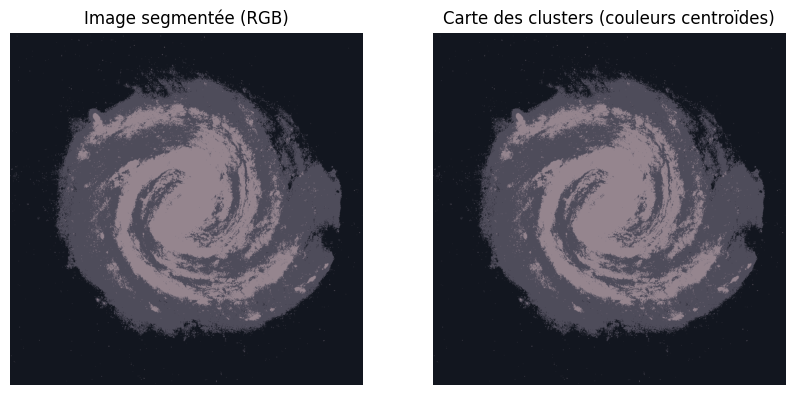

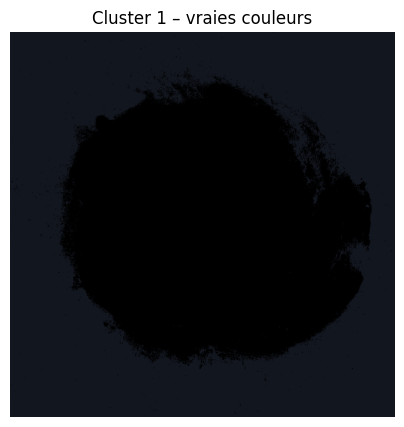

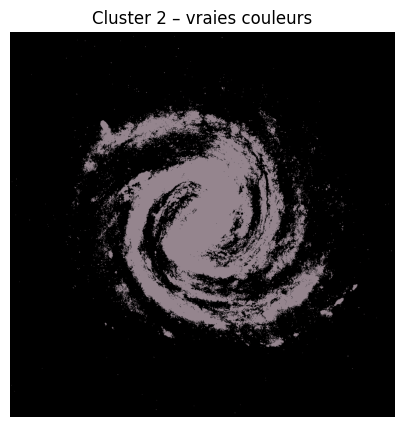

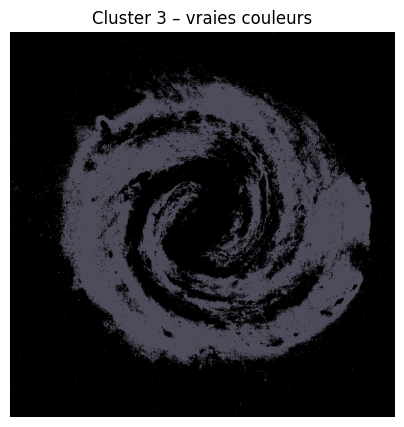

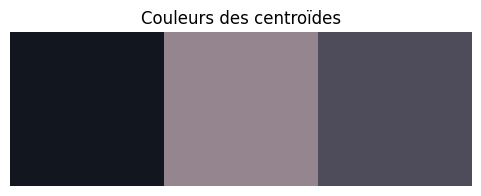

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def initialiser_matrice_U(nb_points, K):
    U = np.random.rand(nb_points, K)
    U = U / np.sum(U, axis=1, keepdims=True)
    return U


def mettre_a_jour_C(U, C, pixels, m):
    K = C.shape[0]
    new_C = np.zeros((K, 3))

    for i in range(K):
        um = U[:, i] ** m
        num = np.sum(pixels * um[:, None], axis=0)
        den = np.sum(um)
        new_C[i] = num / den

    return new_C


def distance_euclidian(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))


def mettre_a_jour_U_RGB(U, C, pixels, m):
    nb_points = pixels.shape[0]
    K = C.shape[0]

    for j in range(nb_points):
        for i in range(K):
            dist_i = distance_euclidian(pixels[j], C[i])

            if dist_i < 1e-6:
                U[j] = 0
                U[j, i] = 1
                continue

            denom = 0
            for k in range(K):
                dist_k = distance_euclidian(pixels[j], C[k])
                if dist_k < 1e-6:
                    dist_k = 1e-6
                denom += (dist_i / dist_k) ** (2 / (m - 1))

            U[j][i] = 1 / denom

    return U


def fuzzy_c_means(image_path, K=2, m=2, max_iter=20, tol=1e-5):

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float64) / 255.0

    h, w, _ = img.shape
    pixels = img.reshape(-1, 3)
    nb_points = h * w

    U = initialiser_matrice_U(nb_points, K)
    C = np.random.rand(K, 3)

    for iteration in range(max_iter):
        old_C = C.copy()

        C = mettre_a_jour_C(U, C, pixels, m)
        U = mettre_a_jour_U_RGB(U, C, pixels, m)

        diff = np.linalg.norm(C - old_C)
        print(f"Iteration {iteration+1} — Différence: {diff:.6f}")

        if diff < tol:
            print("Convergence atteinte ✅")
            break

    clustered = C[np.argmax(U, axis=1)].reshape(h, w, 3)
    return clustered, C, U.reshape(h, w, K)


clustered, C, U = fuzzy_c_means("/content/milky-way.jpg", K=3, m=2)

print("Centres finaux :", C)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image segmentée (RGB)")
plt.imshow(clustered)
plt.axis("off")

    # 2. Cluster map (centroid colors)
plt.subplot(1, 2, 2)
plt.title("Carte des clusters (couleurs centroïdes)")
cluster_map = C[np.argmax(U, axis=2)]
plt.imshow(cluster_map)
plt.axis("off")
plt.show()

    # 3. Afficher chaque cluster isolé
for k in range(C.shape[0]):
        plt.figure(figsize=(5,5))
        plt.title(f"Cluster {k+1} – vraies couleurs")
        cluster_mask = np.argmax(U, axis=2) == k
        cluster_img = clustered.copy()
        cluster_img[~cluster_mask] = 0
        plt.imshow(cluster_img)
        plt.axis("off")
        plt.show()

    # 4. Affichage des couleurs des centroïdes
plt.figure(figsize=(6,2))
plt.title("Couleurs des centroïdes")
plt.imshow(C.reshape(1, -1, 3))
plt.axis("off")
plt.show()


Iteration 1 — Différence: 1.157925
Iteration 2 — Différence: 0.001492
Iteration 3 — Différence: 0.005756
Iteration 4 — Différence: 0.022344
Iteration 5 — Différence: 0.093505
Iteration 6 — Différence: 0.381399
Iteration 7 — Différence: 0.308030
Iteration 8 — Différence: 0.147584
Iteration 9 — Différence: 0.052916
Iteration 10 — Différence: 0.016062
Iteration 11 — Différence: 0.004611
Iteration 12 — Différence: 0.001303
Iteration 13 — Différence: 0.000367
Iteration 14 — Différence: 0.000103
Iteration 15 — Différence: 0.000029
Iteration 16 — Différence: 0.000008
Convergence atteinte ✅
Centres finaux : [[0.67287253 0.22791436 0.19585519]
 [0.98597265 0.98565652 0.98564729]]


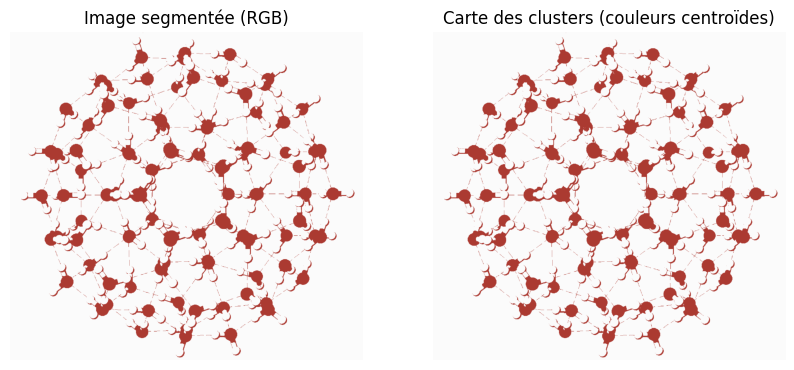

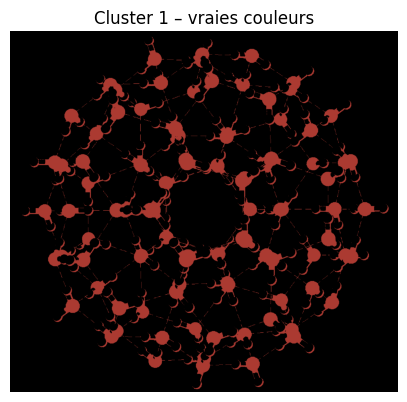

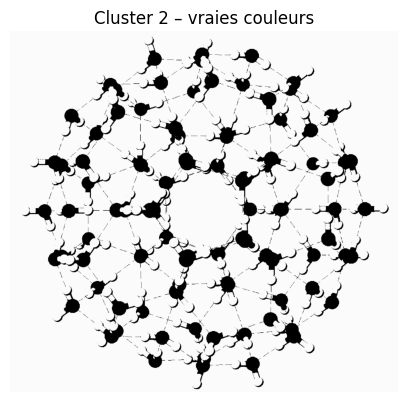

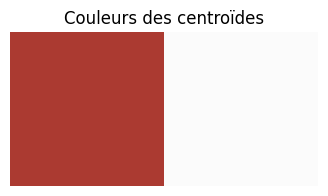

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def initialiser_matrice_U(nb_points, K):
    U = np.random.rand(nb_points, K)
    U = U / np.sum(U, axis=1, keepdims=True)
    return U


def mettre_a_jour_C(U, C, pixels, m):
    K = C.shape[0]
    new_C = np.zeros((K, 3))

    for i in range(K):
        um = U[:, i] ** m
        num = np.sum(pixels * um[:, None], axis=0)
        den = np.sum(um)
        new_C[i] = num / den

    return new_C


def distance_euclidian(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))


def mettre_a_jour_U_RGB(U, C, pixels, m):
    nb_points = pixels.shape[0]
    K = C.shape[0]

    for j in range(nb_points):
        for i in range(K):
            dist_i = distance_euclidian(pixels[j], C[i])

            if dist_i < 1e-6:
                U[j] = 0
                U[j, i] = 1
                continue

            denom = 0
            for k in range(K):
                dist_k = distance_euclidian(pixels[j], C[k])
                if dist_k < 1e-6:
                    dist_k = 1e-6
                denom += (dist_i / dist_k) ** (2 / (m - 1))

            U[j][i] = 1 / denom

    return U


def fuzzy_c_means(image_path, K=2, m=2, max_iter=20, tol=1e-5):

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float64) / 255.0

    h, w, _ = img.shape
    pixels = img.reshape(-1, 3)
    nb_points = h * w

    U = initialiser_matrice_U(nb_points, K)
    C = np.random.rand(K, 3)

    for iteration in range(max_iter):
        old_C = C.copy()

        C = mettre_a_jour_C(U, C, pixels, m)
        U = mettre_a_jour_U_RGB(U, C, pixels, m)

        diff = np.linalg.norm(C - old_C)
        print(f"Iteration {iteration+1} — Différence: {diff:.6f}")

        if diff < tol:
            print("Convergence atteinte ✅")
            break

    clustered = C[np.argmax(U, axis=1)].reshape(h, w, 3)
    return clustered, C, U.reshape(h, w, K)


clustered, C, U = fuzzy_c_means("/content/Capture d’écran 2025-11-15 à 14.30.45.png", K=2, m=2)

print("Centres finaux :", C)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image segmentée (RGB)")
plt.imshow(clustered)
plt.axis("off")

    # 2. Cluster map (centroid colors)
plt.subplot(1, 2, 2)
plt.title("Carte des clusters (couleurs centroïdes)")
cluster_map = C[np.argmax(U, axis=2)]
plt.imshow(cluster_map)
plt.axis("off")
plt.show()

    # 3. Afficher chaque cluster isolé
for k in range(C.shape[0]):
        plt.figure(figsize=(5,5))
        plt.title(f"Cluster {k+1} – vraies couleurs")
        cluster_mask = np.argmax(U, axis=2) == k
        cluster_img = clustered.copy()
        cluster_img[~cluster_mask] = 0
        plt.imshow(cluster_img)
        plt.axis("off")
        plt.show()

    # 4. Affichage des couleurs des centroïdes
plt.figure(figsize=(6,2))
plt.title("Couleurs des centroïdes")
plt.imshow(C.reshape(1, -1, 3))
plt.axis("off")
plt.show()
